In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
COLORS = ["#348ABD", "#A60628", "#7A68A6", "#467821", "#D55E00", "#CC79A7", "#56B4E9", "#009E73", "#F0E442", "#0072B2"]
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=COLORS)

In [2]:
dataset = "yl1L"
algos = ["bcd_cyclic", "fista", "bcd_gl"]

In [3]:
df1 = pd.read_csv(f"./results/{algos[0]}/{dataset}/results.csv")
df2 = pd.read_csv(f"./results/{algos[1]}/{dataset}/results.csv")
df3 = pd.read_csv(f"./results/{algos[2]}/{dataset}/results.csv")

In [4]:
loss1, time1 = df1["losses"], np.array(np.cumsum(df1["time_itr"])) + df1["preprocess_time"][0]
loss2, time2 = df2["losses"], np.array(np.cumsum(df2["time_itr"])) + df2["preprocess_time"][0]
loss3, time3 = df3["losses"], np.array(np.cumsum(df3["time_itr"])) + df3["preprocess_time"][0]

In [5]:
len(loss1), len(time1), len(loss2), len(time2), len(loss3), len(time3)

(27850, 27850, 22142, 22142, 4600, 4600)

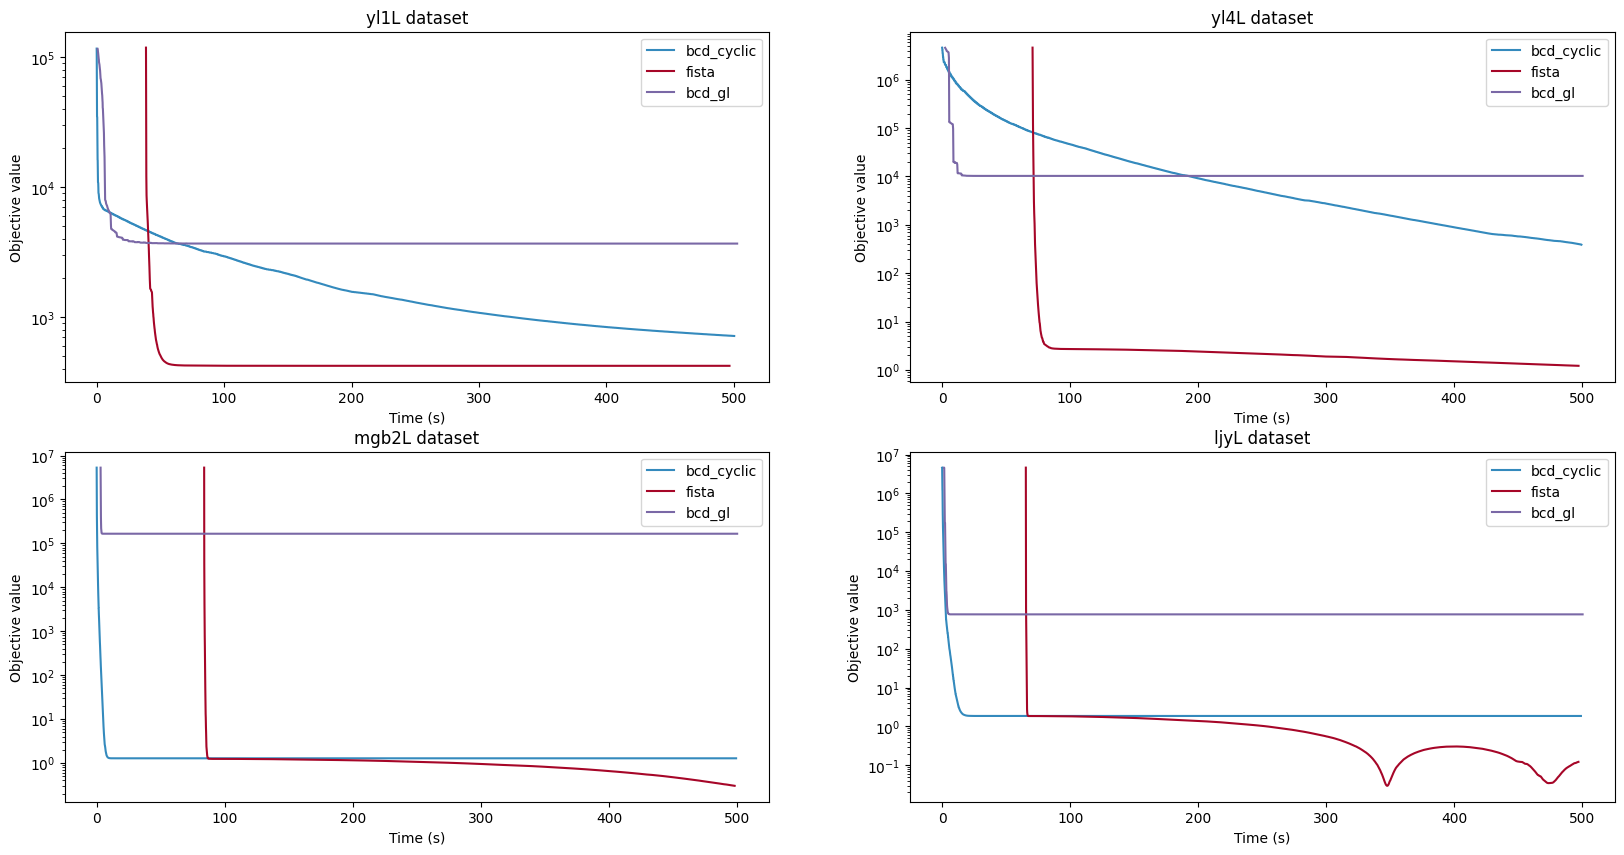

In [6]:
datasets = ["yl1L", "yl4L", "mgb2L", "ljyL"]
plt.figure(figsize=(20, 10))
for i, dataset in enumerate(datasets):
    df1 = pd.read_csv(f"./results/{algos[0]}/{dataset}/results.csv")
    df2 = pd.read_csv(f"./results/{algos[1]}/{dataset}/results.csv")
    df3 = pd.read_csv(f"./results/{algos[2]}/{dataset}/results.csv")
    loss1, time1 = df1["losses"], np.array(np.cumsum(df1["time_itr"])) + df1["preprocess_time"][0]
    loss2, time2 = df2["losses"], np.array(np.cumsum(df2["time_itr"])) + df2["preprocess_time"][0]
    loss3, time3 = df3["losses"], np.array(np.cumsum(df3["time_itr"])) + df3["preprocess_time"][0]
    plt.subplot(2,2, i+1)
    plt.plot(time1, loss1, label=algos[0])
    plt.plot(time2, loss2, label=algos[1])
    plt.plot(time3, loss3, label=algos[2])
    plt.xlabel("Time (s)")
    plt.ylabel("Objective value")
    plt.title(f"{dataset} dataset")
    plt.yscale("log")
    plt.legend()
plt.show()